## Importing Libraries

In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Setting Directory

In [3]:
train_directory='../input/100-bird-species/train'
val_directory='../input/100-bird-species/valid'
test_directory='../input/100-bird-species/test'

In [9]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [31]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


# Transfer Learning Using RESNET 101

In [27]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

171319296/171317808 [==============================] - 2s 0us/step


In [32]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225,activation='softmax'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 100352)            401408    
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_15 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_8 (Activation)    (None, 2048)             

In [36]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [37]:
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
123/123 [==============================] - 110s 891ms/step - loss: 2.1177 - accuracy: 0.5437 - val_loss: 0.3394 - val_accuracy: 0.8978
Epoch 2/5
123/123 [==============================] - 107s 873ms/step - loss: 0.4075 - accuracy: 0.9034 - val_loss: 0.2226 - val_accuracy: 0.9476
Epoch 3/5
123/123 [==============================] - 108s 875ms/step - loss: 0.1395 - accuracy: 0.9709 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 4/5
123/123 [==============================] - 110s 895ms/step - loss: 0.0700 - accuracy: 0.9865 - val_loss: 0.1796 - val_accuracy: 0.9556
Epoch 5/5
123/123 [==============================] - 110s 891ms/step - loss: 0.0419 - accuracy: 0.9928 - val_loss: 0.1772 - val_accuracy: 0.9573


In [51]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=1)

123/123 [==============================] - 111s 906ms/step - loss: 0.0081 - accuracy: 0.9994 - val_loss: 0.1583 - val_accuracy: 0.9618


# Accuracy Plot

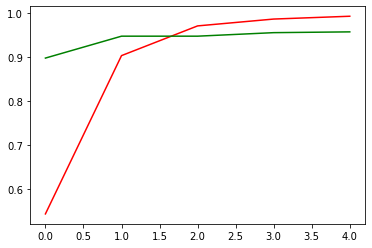

In [40]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')

# Loss Plot

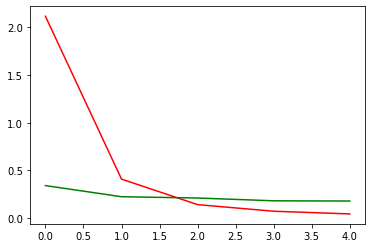

In [41]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')

# Test Accuracy

In [52]:
model.evaluate(test_gemerator)

5/5 [==============================] - 3s 556ms/step - loss: 0.0759 - accuracy: 0.9778


[0.07588095963001251, 0.9777777791023254]

# Prediction

In [58]:
from keras.preprocessing.image import load_img,img_to_array

In [110]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    print ('Bird Is',icd[answer[0]], 'With probability',probability)

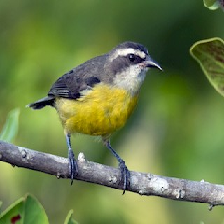

In [3]:
s=load_img('../input/fj-fdjvdk-vmdvdjl/bananan.jpg',target_size=(224,224,3))
s

In [119]:
img='../input/fj-fdjvdk-vmdvdjl/bananan.jpg'
output(img)

Bird Is BANANAQUIT With probability 97.41
